Converting the annotations to the format that is expected by YoloV7. Each image should have it's own .txt file with the following format:
- One row per bounding box,
- 'class', 'x_center', 'y_center', 'width', and 'height' columns in each row,
- Normalised box coordinates (between 0 and 1),
- Class numbers start from 0.

# Explore the current format of the freshly downloaded MIAP dataset

#### Visualise files and labels format

In [7]:
from os import listdir
from os.path import abspath, join, isdir

path = "./../datasets/MIAP"
print("The MIAP dataset is located in " + abspath(path) + ". Directory content:\n")

content = sorted(listdir(path))
directories = [directory for directory in content if isdir(join(path, directory))]

for directory in directories:
    if not directory.startswith('.'):
        print(directory)
        subcontent = sorted(listdir(join(path, directory)))
        for file in subcontent:
            print('├──' + file) if not file.startswith('.') else None

The MIAP dataset is located in /home/jovyan/datasets/MIAP. Directory content:

images
├──test
├──train
├──val
labels
├──open_images_extended_miap_boxes_test.csv
├──open_images_extended_miap_boxes_train.csv
├──open_images_extended_miap_boxes_val.csv


In [4]:
import pandas as pd
from os.path import join

test_boxes_path = join(path, 'labels/open_images_extended_miap_boxes_test.csv')
train_boxes_path = join(path, 'labels/open_images_extended_miap_boxes_train.csv')
val_boxes_path = join(path, 'labels/open_images_extended_miap_boxes_val.csv')

test_boxes = pd.read_csv(test_boxes_path)
train_boxes = pd.read_csv(train_boxes_path)
val_boxes = pd.read_csv(val_boxes_path)

print('All the labels are in three .csv files and they are structured as follows:\n')
print(test_boxes.head())

All the labels are in three .csv files and they are structured as follows:

            ImageID  LabelName  Confidence      XMin      XMax      YMin  \
0  bfd36174b9f3e2d0  /m/01g317           1  0.401471  0.908824  0.000000   
1  9751d4090f6cd72c  /m/01g317           1  0.439063  0.998438  0.275000   
2  bcb76642a02b26e7  /m/01g317           1  0.140000  0.294000  0.604555   
3  59fe5f93b59e56eb  /m/01g317           1  0.000000  0.998408  0.000000   
4  e862bce0462a53e3  /m/01g317           1  0.042424  0.981818  0.014540   

       YMax  IsOccluded  IsTruncated  IsGroupOf  IsDepictionOf  IsInsideOf  \
0  0.913526         0.0          0.0        0.0            0.0         0.0   
1  0.997917         0.0          0.0        0.0            0.0         0.0   
2  0.619048         0.0          0.0        0.0            0.0         0.0   
3  0.997778         0.0          0.0        0.0            0.0         0.0   
4  0.980614         0.0          0.0        0.0            0.0         0.0   

In [5]:
test_boxes_sorted = test_boxes.sort_values(by='ImageID')
train_boxes_sorted = train_boxes.sort_values(by='ImageID')
val_boxes_sorted = val_boxes.sort_values(by='ImageID')

print('Each row cointains information about a single bounding box. Therefore, the same image can appear more than once in the table, if it has more than one bounding box.\n ')
print(test_boxes_sorted.head(20))

Each row cointains information about a single bounding box. Therefore, the same image can appear more than once in the table, if it has more than one bounding box.
 
                ImageID  LabelName  Confidence      XMin      XMax      YMin  \
812    00045d609ca3f4eb  /m/01g317           1  0.441003  1.000000  0.000000   
17842  00045d609ca3f4eb  /m/01g317           1  0.000000  0.286136  0.000000   
30374  00094d5e8b3cb038  /m/01g317           1  0.322059  0.841176  0.119734   
8095   00094d5e8b3cb038  /m/01g317           1  0.000000  0.422059  0.000000   
18894  000aa0b1c8fd5ddf  /m/01g317           1  0.165932  0.494861  0.262222   
8687   000dbcc283d87f67  /m/01g317           1  0.022541  0.985656  0.011146   
41054  001341ae9926808d  /m/01g317           1  0.000000  1.000000  0.000000   
39636  001341ae9926808d  /m/01g317           1  0.000000  1.000000  0.000000   
50765  0013a0927e6bbefc  /m/01g317           1  0.254687  0.464063  0.291667   
60444  00183df6ffe09093  /m/01g317

#### Visualise MIAP images together with their annotations 

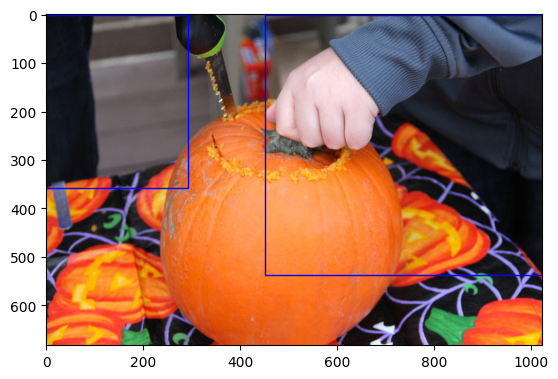

In [27]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

test_img_path = join(path, 'images/test', test_boxes_sorted['ImageID'].iloc[0] + '.jpg')
first_row = test_boxes_sorted.iloc[0]
second_row = test_boxes_sorted.iloc[1]

fig, ax = plt.subplots()
im = plt.imread(test_img_path)
ax.imshow(im)

img_width = im.shape[1]
img_height = im.shape[0]

for index, row in test_boxes_sorted.iloc[:2].iterrows():
    x_min = row['XMin'] * img_width
    x_max = row['XMax'] * img_width
    y_min = row['YMin'] * img_height
    y_max = row['YMax'] * img_height

    rect = patches.Rectangle((x_min, y_min),
                             x_max - x_min,
                             y_max - y_min,
                             linewidth=1, edgecolor='r' if index == 0 else 'b', facecolor='none')

    ax.add_patch(rect)
    
plt.show()

00045d609ca3f4eb
X: 451.587072 - 1024.0
Y: 0.0 - 536.426834
00045d609ca3f4eb
X: 0.0 - 293.003264
Y: 0.0 - 358.121488
00094d5e8b3cb038
X: 329.788416 - 861.364224
Y: 81.41911999999999 - 680.0
00094d5e8b3cb038
X: 0.0 - 432.188416
Y: 0.0 - 680.0
000aa0b1c8fd5ddf
X: 169.914368 - 508.240896
Y: 177.786516 - 590.613258
000aa0b1c8fd5ddf
X: 169.914368 - 506.737664
Y: 177.786516 - 590.613258
000dbcc283d87f67
X: 17.920095 - 783.5965199999999
Y: 11.413504 - 1024.0
001341ae9926808d
X: 0.0 - 985.0
Y: 0.0 - 967.816192
001341ae9926808d
X: 0.0 - 985.0
Y: 0.0 - 500.219904
0013a0927e6bbefc
X: 260.799488 - 475.200512
Y: 224.000256 - 473.60025599999994
00183df6ffe09093
X: 834.566144 - 943.193088
Y: 299.43602000000004 - 435.90409
0019ac4eb659f57e
X: 0.0 - 86.535168
Y: 41.654423 - 126.564327
0019ac4eb659f57e
X: 336.525312 - 964.707328
Y: 115.35 - 740.1625
0019ac4eb659f57e
X: 371.780608 - 695.486464
Y: 65.68567300000001 - 467.808077
0019ac4eb659f57e
X: 379.793408 - 700.294144
Y: 67.2875 - 360.46875
0019ac4eb65

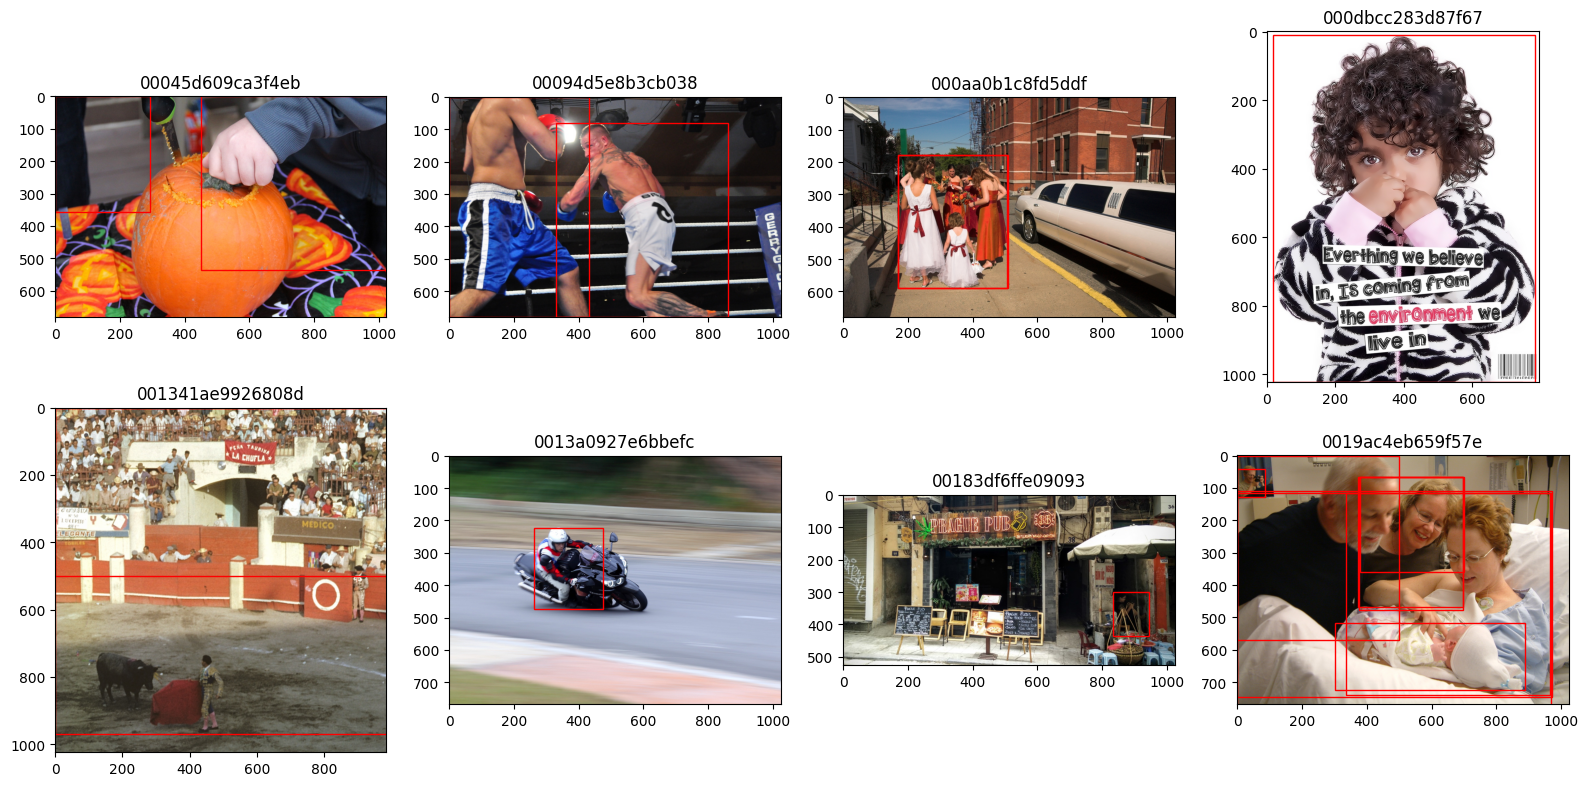

In [29]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from os.path import join
import numpy as np

fig, axs = plt.subplots(2, 4, figsize=(16, 8))

# Iterate over the first 8 images
for i, ax in enumerate(axs.flatten()):
    if i < len(test_boxes_sorted['ImageID'].unique()):
        # Get image and bounding box information
        img_id = test_boxes_sorted['ImageID'].unique()[i]
        img_path = join(path, 'images/test', f"{img_id}.jpg")
        img_boxes = test_boxes_sorted[test_boxes_sorted['ImageID'] == img_id]

        # Read and display image
        im = plt.imread(img_path)
        ax.imshow(im)

        # Get image dimensions
        img_width = im.shape[1]
        img_height = im.shape[0]

        # Display bounding boxes
        for index, row in img_boxes.iterrows():
            x_min = row['XMin'] * img_width
            x_max = row['XMax'] * img_width
            y_min = row['YMin'] * img_height
            y_max = row['YMax'] * img_height

            rect = patches.Rectangle((x_min, y_min),
                                     x_max - x_min,
                                     y_max - y_min,
                                     linewidth=1, edgecolor='r', facecolor='none')

            print(f"{img_id}\nX: {x_min} - {x_max}\nY: {y_min} - {y_max}")
            ax.add_patch(rect)
            
        ax.set_title(img_id)
    else:
        # Remove extra subplot
        fig.delaxes(ax)

plt.tight_layout()
plt.show()

# Convert labels from .csv format to .txt (compatible with Yolo)

#### Test code on a small subset to ensure proper computation and saving

In [44]:
subset = test_boxes_sorted.head(20).copy()
subset.loc[:, 'x_center'] = (subset['XMin'] + subset['XMax']) / 2
subset.loc[:, 'y_center'] = (subset['YMin'] + subset['YMax']) / 2
subset.loc[:, 'width'] = subset['XMax'] - subset['XMin']
subset.loc[:, 'height'] = subset['YMax'] - subset['YMin']

grouped = subset.groupby('ImageID')
save_path = './MIAP_tests/'

for name, group in grouped:
    with open(f'{save_path}{name}.txt', 'w') as f:
        for index, row in group.iterrows():
            f.write(f"0 {row['x_center']} {row['y_center']} {row['width']} {row['height']}\n")

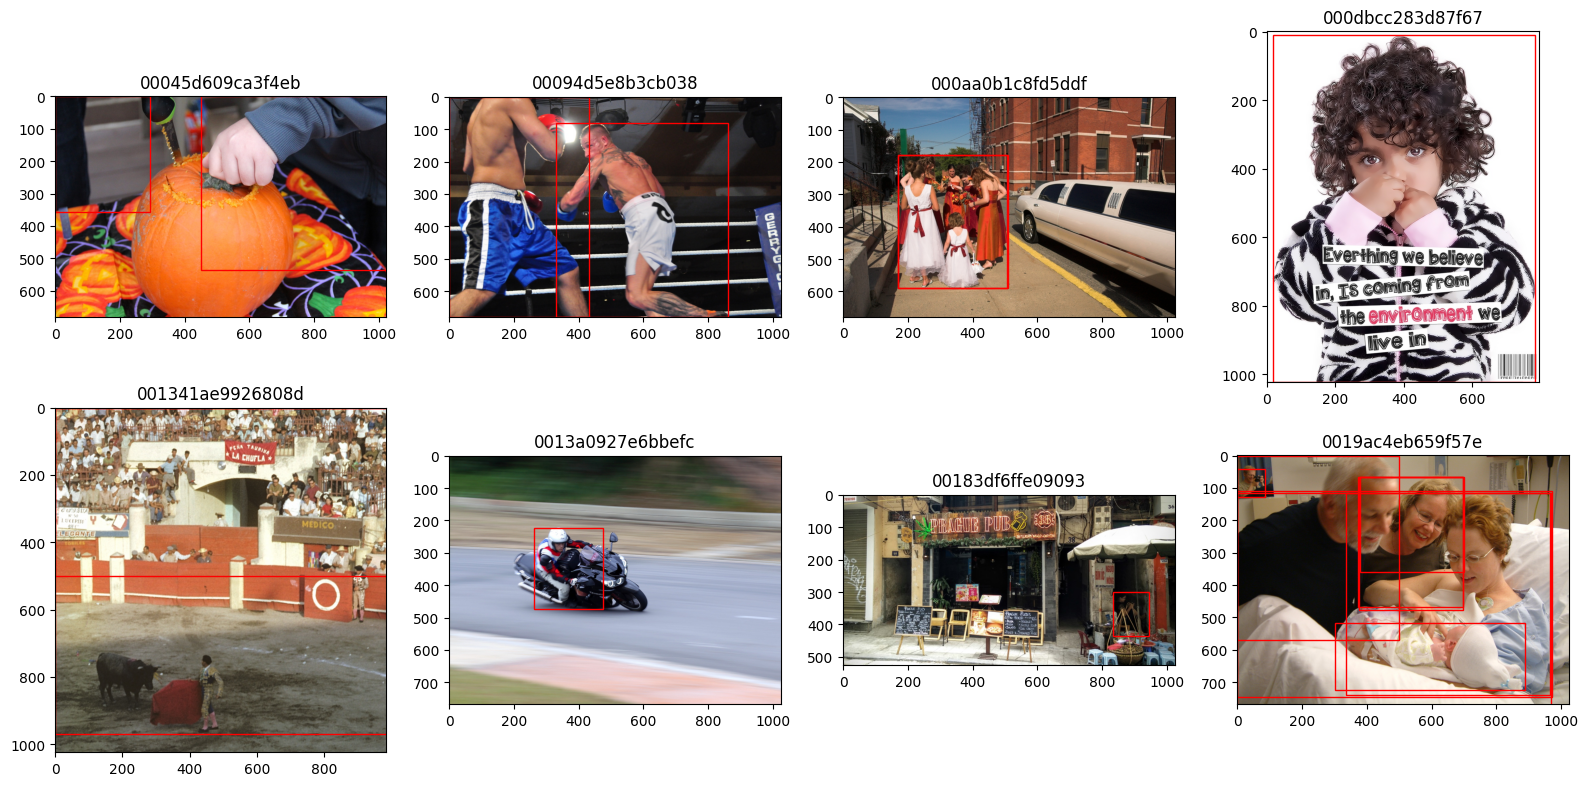

In [48]:
# now test if calculated and saved properly

subset_labels = sorted([f for f in listdir(save_path) if not f.startswith('.')])

fig, axs = plt.subplots(2, 4, figsize=(16, 8))

for i, ax in enumerate(axs.flatten()):
    img_id = subset_labels[i][:-4]
    img_path = join(path, 'images/test', f"{img_id}.jpg")
    img_boxes = pd.read_csv(join(save_path, subset_labels[i]), delimiter=' ', header=None)

    im = plt.imread(img_path)
    ax.imshow(im)

    img_width = im.shape[1]
    img_height = im.shape[0]
    
    for _, row in img_boxes.iterrows():
        class_, x_center, y_center, width, height = row
        x_min = (x_center - width / 2) * img_width
        y_min = (y_center - height / 2) * img_height
        rect = patches.Rectangle((x_min, y_min), width * img_width, height * img_height,
                                     linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

    ax.set_title(img_id)

plt.tight_layout()
plt.show()

#### Convert and save all 'train' labels

In [53]:
from os import makedirs
from os.path import exists
from tqdm import tqdm

save_path = join(path, 'labels/train/')
makedirs(save_path) if not exists(save_path) else None

train_boxes_sorted.loc[:, 'x_center'] = (train_boxes_sorted['XMin'] + train_boxes_sorted['XMax']) / 2
train_boxes_sorted.loc[:, 'y_center'] = (train_boxes_sorted['YMin'] + train_boxes_sorted['YMax']) / 2
train_boxes_sorted.loc[:, 'width'] = train_boxes_sorted['XMax'] - train_boxes_sorted['XMin']
train_boxes_sorted.loc[:, 'height'] = train_boxes_sorted['YMax'] - train_boxes_sorted['YMin']

grouped = train_boxes_sorted.groupby('ImageID')

for name, group in tqdm(grouped, desc='Processing Images'):
    with open(f'{save_path}{name}.txt', 'w') as f:
        for index, row in group.iterrows():
            f.write(f"0 {row['x_center']} {row['y_center']} {row['width']} {row['height']}\n")

Processing Images: 100%|██████████| 70000/70000 [00:29<00:00, 2379.32it/s]


#### Convert and save all 'test' labels

In [55]:
save_path = join(path, 'labels/test/')
makedirs(save_path) if not exists(save_path) else None

test_boxes_sorted.loc[:, 'x_center'] = (test_boxes_sorted['XMin'] + test_boxes_sorted['XMax']) / 2
test_boxes_sorted.loc[:, 'y_center'] = (test_boxes_sorted['YMin'] + test_boxes_sorted['YMax']) / 2
test_boxes_sorted.loc[:, 'width'] = test_boxes_sorted['XMax'] - test_boxes_sorted['XMin']
test_boxes_sorted.loc[:, 'height'] = test_boxes_sorted['YMax'] - test_boxes_sorted['YMin']

grouped = test_boxes_sorted.groupby('ImageID')

for name, group in tqdm(grouped, desc='Processing Images'):
    with open(f'{save_path}{name}.txt', 'w') as f:
        for index, row in group.iterrows():
            f.write(f"0 {row['x_center']} {row['y_center']} {row['width']} {row['height']}\n")

Processing Images: 100%|██████████| 22590/22590 [00:07<00:00, 3151.28it/s]


#### Convert and save all 'val' labels

In [57]:
save_path = join(path, 'labels/val/')
makedirs(save_path) if not exists(save_path) else None

val_boxes_sorted.loc[:, 'x_center'] = (val_boxes_sorted['XMin'] + val_boxes_sorted['XMax']) / 2
val_boxes_sorted.loc[:, 'y_center'] = (val_boxes_sorted['YMin'] + val_boxes_sorted['YMax']) / 2
val_boxes_sorted.loc[:, 'width'] = val_boxes_sorted['XMax'] - val_boxes_sorted['XMin']
val_boxes_sorted.loc[:, 'height'] = val_boxes_sorted['YMax'] - val_boxes_sorted['YMin']

grouped = val_boxes_sorted.groupby('ImageID')

for name, group in tqdm(grouped, desc='Processing Images'):
    with open(f'{save_path}{name}.txt', 'w') as f:
        for index, row in group.iterrows():
            f.write(f"0 {row['x_center']} {row['y_center']} {row['width']} {row['height']}\n")

Processing Images: 100%|██████████| 7410/7410 [00:02<00:00, 3158.39it/s]


#### Remove unnecassary files with labels in .csv format

In [64]:
from os import remove

remove(join(path, 'labels/open_images_extended_miap_boxes_test.csv'))
remove(join(path, 'labels/open_images_extended_miap_boxes_train.csv'))
remove(join(path, 'labels/open_images_extended_miap_boxes_val.csv'))

# Present the result - MIAP dataset ready to use in Yolo training

In [68]:
print("The MIAP dataset is located in " + abspath(path) + ". Directory content:\n")

content = sorted(listdir(path))
directories = [directory for directory in content if isdir(join(path, directory))]

for directory in directories:
    if not directory.startswith('.'):
        print(directory)
        subcontent = sorted(listdir(join(path, directory)))
        for file in subcontent:
            subdirectory_path = join(path, directory, file)
            num_files = len([f for f in listdir(subdirectory_path) if isfile(join(subdirectory_path, f))])
            print('├──' + file + f"    <-- contains {num_files} files") if not file.startswith('.') else None

The MIAP dataset is located in /home/jovyan/datasets/MIAP. Directory content:

images
├──test    <-- contains 22590 files
├──train    <-- contains 70000 files
├──val    <-- contains 7410 files
labels
├──test    <-- contains 22590 files
├──train    <-- contains 70000 files
├──val    <-- contains 7410 files
